In [672]:
File_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [690]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

df=pd.read_csv("laptops.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [691]:
# checking for missing data
missing_data=df.isnull().sum()
missing_data

Unnamed: 0.1        0
Unnamed: 0          0
Manufacturer        0
Category            0
GPU                 0
OS                  0
CPU_core            0
Screen_Size_inch    0
CPU_frequency       0
RAM_GB              0
Storage_GB_SSD      0
Weight_pounds       0
Price               0
Price-binned        0
Screen-Full_HD      0
Screen-IPS_panel    0
dtype: int64

-  from what we see above there is no column with missing entries

In [692]:
# checking for the data types
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

from what we see above the data types are okay

In [693]:
# saving the cleaned data set
df.to_csv("ISMAIL.csv", index=False)

In [694]:
#loading the cleaned data
Cleaned_data=pd.read_csv("ISMAIL.csv")
Cleaned_data.head(4)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.5280,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.8510,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.8510,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.6901,1244,Low,0,1


In [695]:
# creating a single feature linear regression model
X = Cleaned_data[["CPU_frequency"]]
Y = Cleaned_data["Price"]

# splitting the data into training and testing test
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state= 42)

# Training the model
model = LinearRegression()
model.fit(X_train,y_train)

# Making predictions
y_pred = model.predict(X_test)



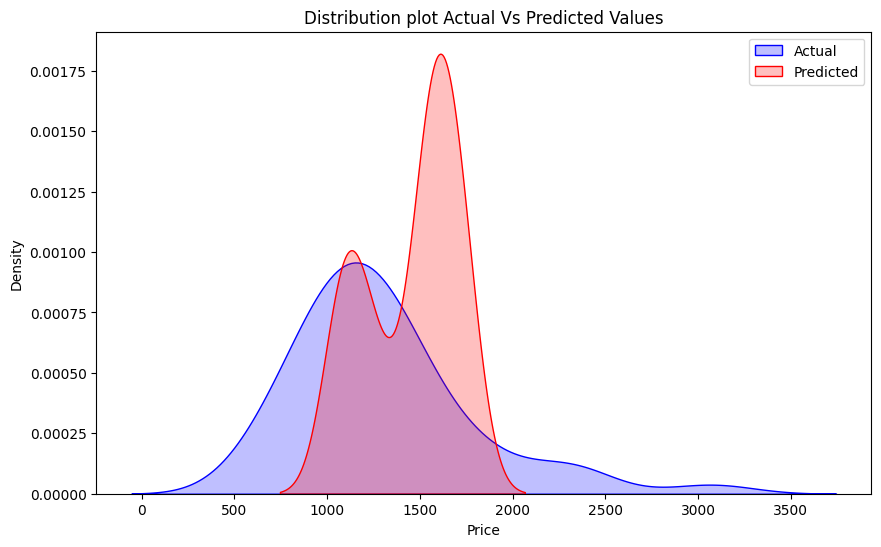

In [696]:
# creating a data frame
results= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# plotting the distribution Actual Vs Predicted
plt.figure(figsize=(10,6))
sns.kdeplot(results['Actual'], label ='Actual', fill = True, color = 'blue')
sns.kdeplot(results['Predicted'], label = 'Predicted', fill = True, color = 'red')
plt.title('Distribution plot Actual Vs Predicted Values')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [697]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's parameters and evaluation metrics
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficient (Slope): 1580.2477854928034
Model Intercept: 206.82010195771954
Mean Squared Error: 239035.9942943603
R-squared: -0.03719417833496452


- the model performed badly with a negative r2 score of 0.037, which means that CPU_frequecy only explains 3.7% of the variation in Prices

- MSE also shows a bad performance with 239036 squared errors, in general this model performed poorly but it can can be futher improved using a pipeline, polynomial tranformations, standard scaler etc

**Question B (5 marks)**

<ol type="a">
<li>Check the correlation of variables; 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category' with the target variable 'price' using both statistics and visuals. Explain your results.</li>
<li>Use variables in 'part a' to create a Multiple Linear Regression system.</li>
<li>Plot the Distribution graph of the predicted values as well as the Actual values.</li>
<li>Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?</li>
</ol>

In [698]:
#correlation
Features = Cleaned_data[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category','Price']]
correlation_matrix = Features.corr()

print("Correlation Matrix:")
print(correlation_matrix[['Price']].sort_values(by='Price', ascending= False))

Correlation Matrix:
                   Price
Price           1.000000
RAM_GB          0.549297
CPU_core        0.459398
CPU_frequency   0.366666
GPU             0.288298
Category        0.286243
Storage_GB_SSD  0.243421
OS             -0.221730


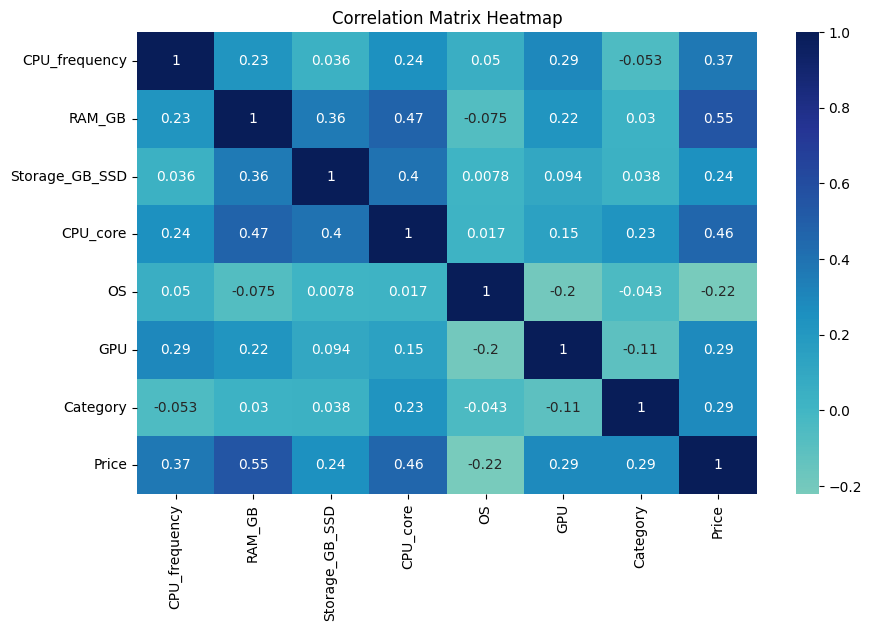

In [699]:
# plotting a heat map
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'YlGnBu', center = 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

 From the visuals and statistics above the following can be deduced

- RAM_GB shows a relatively high positive correlation with price of about 0.55

- CPU_score and CPU_frequency show a moderate positive correlation with the price of the laptop

- others features such as storage, OS, GPU, Category they show a low correlation with the price of the laptop

In [700]:
# creating a multiple linear regression
X_Multi= Features.drop(columns=['Price'])
Y_Multi= Features['Price']
# spliting the data into train and test sets
X_train_Multi, X_test_Multi, y_train_multi, y_test_multi = train_test_split(X_Multi, Y_Multi, test_size= 0.2 , random_state= 42)

model_multi= LinearRegression()
model_multi.fit(X_train_Multi, y_train_multi)

y_pred_multi = model_multi.predict(X_test_Multi)



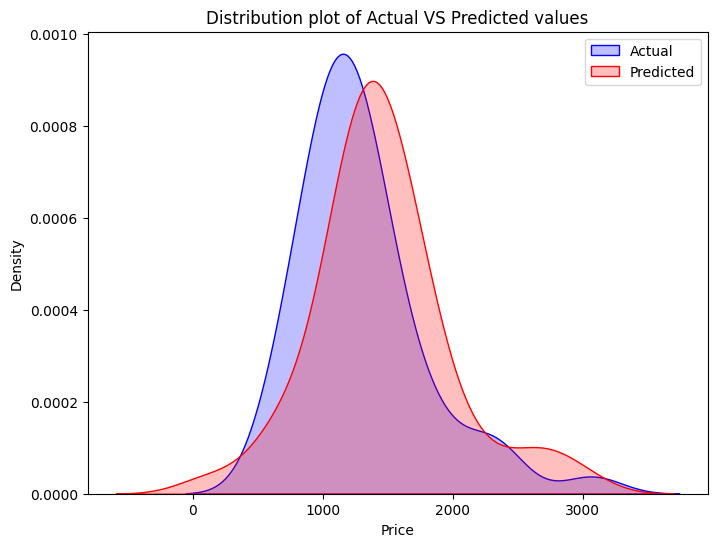

In [701]:
# creating a datframe
results_multi = pd.DataFrame({'Actual_multi':y_test_multi, 'Predicted_multi':y_pred_multi})

# plotting the distribution curve
plt.figure(figsize=(8,6))
sns.kdeplot(results_multi['Actual_multi'], label = 'Actual', fill= True , color='blue')
sns.kdeplot(results_multi['Predicted_multi'], label = 'Predicted', fill = True, color = 'red')
plt.title('Distribution plot of Actual VS Predicted values')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [702]:
# finding the mean squared error and R_squared 
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi,y_pred_multi)

print("mean_squared_error:",mse_multi)
print("R_squared:", r2_multi)

mean_squared_error: 168575.62043820196
R_squared: 0.26853839463024776


The results show a better performance than the previous single linear regression model

- R2 is 27% an improvement from the 3.7% seen in the single linear regression model

- mse is 168575 an improvement from the 239036 seen in the single linear regression model

**Question C (5 marks)**
<ol type="a">
<li>Use the variable "CPU_frequency" to create Polynomial features. Use 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. </li>

<li>Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below in details. </li>


<details>

```python
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
```

</details>

Call this function for the 3 models created and get the required graphs.
    <ol type="i">
        <li>Call for function of degree 1</li>
        <li>Call for function of degree 3</li>
        <li>Call for function of degree 5</li>
    </ol>

<li>Calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values. </li>
<li>Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. </li>
<li>Evaluate the MSE and R^2 values for the this predicted output. Explain your results.</li>
</ol>



In [703]:
X_new = Features['CPU_frequency']
y_new = Features['Price']
degrees = [1,3,5]

# storing the models and predictions
models ={}
predictions = {}
# loopping through each degree and fitting the polynomial model
for degree in degrees:
    poly_coefficients = np.polyfit(X_new, y_new, degree)
    poly_model = np.poly1d(poly_coefficients)
    models[degree]=poly_model
    predictions[degree]= poly_model(X_new) # Predicting on the same data for comparison


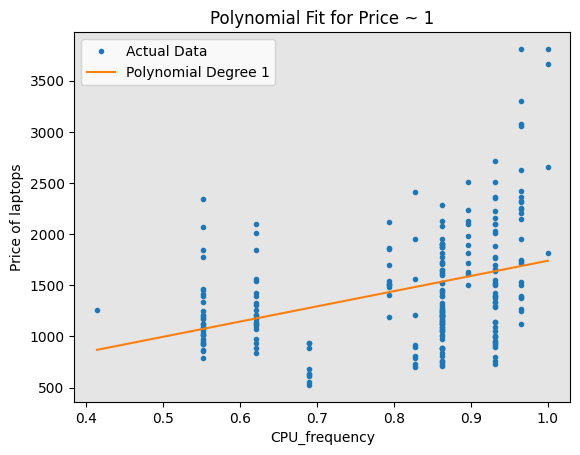

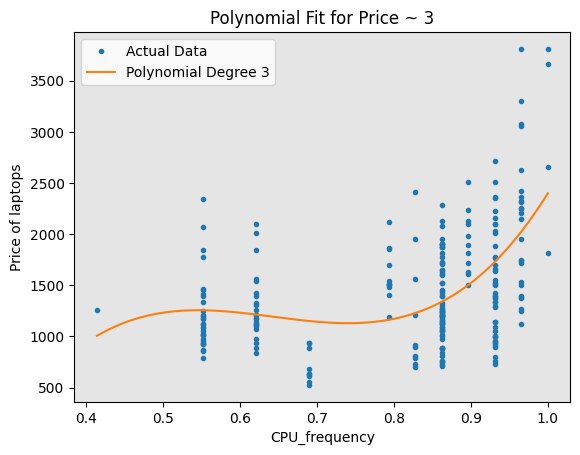

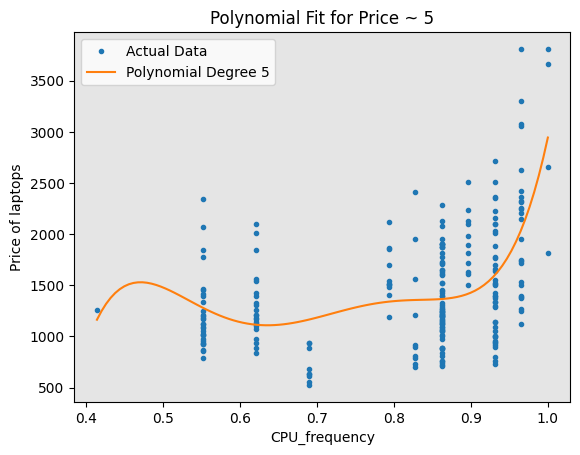

In [704]:
 #Define the PlotPolly function
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', label='Actual Data')
    plt.plot(x_new, y_new, '-', label=f'Polynomial Degree {Name}')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    plt.xlabel('CPU_frequency')
    plt.ylabel('Price of laptops')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.legend()
    plt.show()

# calling the function for each of the polynomial mode

for degree in degrees:
    PlotPolly(models[degree], X, Y, degree)
 

In [705]:
# Evaluating R² and mse
for degree in degrees:
    r2 = r2_score(Y, predictions[degree])
    mse = mean_squared_error(Y, predictions[degree])
    print(f"Degree {degree}: R² = {r2:4f},MSE = {mse:4f}")
 

Degree 1: R² = 0.134444,MSE = 284583.440587
Degree 3: R² = 0.266926,MSE = 241024.863038
Degree 5: R² = 0.303082,MSE = 229137.295481


In [706]:
# creating a pipeline and calcualtion of r2 and mse

X_multiple = Features.drop(columns=['Price'])
y_multiple = Features['Price']

#splitting the data into Train and test sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# creating a pipeline
Pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# fitting the pipeline on the training data
Pipeline.fit(X_train_multiple, y_train_multiple)

y_pred_multiple = Pipeline.predict(X_test_multiple)

# calculation of r2 and mse
Pipeline_r2= r2_score(y_test_multiple, y_pred_multiple)
Pipeline_mse= mean_squared_error(y_test_multiple, y_pred_multiple)

print(f'Pipeline model: R² = {Pipeline_r2:.2f}, MSE = {Pipeline_mse:.2f}')


Pipeline model: R² = -0.05, MSE = 242332.83


Explanation of the results

- From what we see above A negative R² indicates that the model is performing worse than a horizontal line (mean of the dependent variable). This suggests that the model might be significantly misfitting the data 

- The MSE is also extremely large, indicating that the average of the squared differences between predicted and actual values is very high. This suggests poor predictive performance and high variability in the model's predictions


### **SECTION B (20 MARKS)**

In  this section, refine your model's performance in predicting the price of a laptop, given the attribute values.

#### Tasks:

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters

**Question D (5 marks)**

<ol type="a">
<li>Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'.</li>

<li>Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.</li>

<li>Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.</li>

<li>Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.</li>
</ol>

In [707]:
Cleaned_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [708]:
# dropping unnecessary columns
Cleaned_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=1,inplace = True)
Cleaned_data.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [709]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the data
Cleaned_data['Manufacturer'] = label_encoder.fit_transform(Cleaned_data['Manufacturer'])

# Check the transformed column
print(Cleaned_data['Manufacturer'].head())

0    0
1    2
2    2
3    2
4    3
Name: Manufacturer, dtype: int32


In [710]:
x_data = Cleaned_data.drop('Price', axis=1)
x_data = Cleaned_data.drop('Price-binned', axis = 1)
y_data = Cleaned_data['Price']

# splitting the data into training and testing sets
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size= 0.1, random_state= 42)

In [711]:

model = LinearRegression()
model.fit(x_train_data[['CPU_frequency']], y_train_data)
print("Training R^2:", model.score(x_train_data[['CPU_frequency']], y_train_data))
print("Testing R^2:", model.score(x_test_data[['CPU_frequency']], y_test_data))


Training R^2: 0.14704575896482774
Testing R^2: -0.4706643218948636


In [712]:
# running a 4 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train_data[['CPU_frequency']], y_train_data, cv=4, scoring='r2')
# mean and standard deviation of the R^2 scores
print("Mean R^2:", scores.mean())
print("Standard Deviation of R^2:", scores.std())

Mean R^2: 0.14664950700435947
Standard Deviation of R^2: 0.06068324314751394


**Question E (5 marks)**

<ol type="a">
<li>Split the data set into training and testing components again, this time reserving 50% of the data set for testing.</li>

<ol type="i">
<li>Identify the point of overfitting the model on the parameter "CPU_frequency", by creating polynomial features using the single attribute.</li>
<li> Evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5.</li>
<li>Save this set of values of R^2 score as a list.</li>
</ol>

<li>Plot the values of R^2 scores against the order. Note the point where the score drops.</li>


In [713]:
# splitting data (50% testing)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

In [714]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

r2_scores = []
for degree in range(1, 6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train_data[['CPU_frequency']], y_train_data)
    r2_scores.append(model.score(x_test_data[['CPU_frequency']], y_test_data))

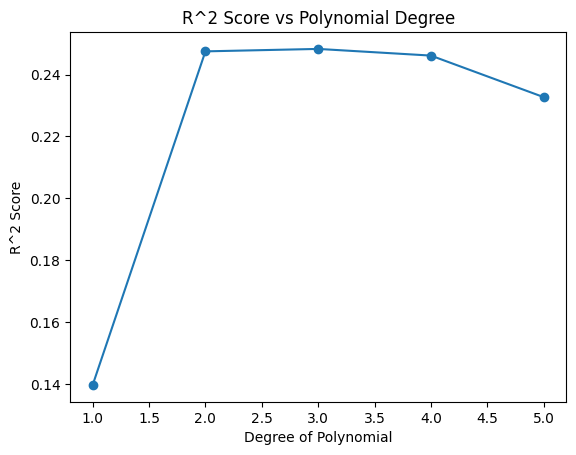

In [715]:

plt.plot(range(1, 6), r2_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Polynomial Degree')
plt.show()

Observation

- the point of where the score drops shaply is at polynomial degree 5 

**Question F (5 marks)**

<ol type="a">
<li>Consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. </li>

<ol type="i">
<li>Create a polynomial feature model that uses all these parameters with degree=2 </li>
<li> Create the training and testing attribute sets.</li>
</ol>

<li>Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 
</li>
<li>Plot the R^2 values for training and testing sets with respect to the value of alpha. Explain your output</li>


In [716]:
features = ['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(x_train_data[features], y_train_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [717]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = np.arange(0.001, 1.001, 0.001)
train_scores, test_scores = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_data[features], y_train_data)
    train_scores.append(ridge.score(x_train_data[features], y_train_data))
    test_scores.append(ridge.score(x_test_data[features], y_test_data))

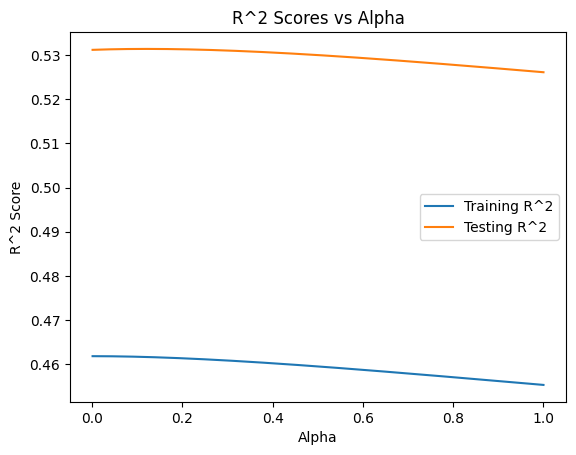

In [718]:
plt.plot(alphas, train_scores, label="Training R^2")
plt.plot(alphas, test_scores, label="Testing R^2")
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.legend()
plt.title('R^2 Scores vs Alpha')
plt.show()

**Question G (5 marks)**

<ol type="a">
<li>Using the raw data and the same set of features as used in F above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```</li>

<li>Create a Ridge instance and run Grid Search using a 4 fold cross validation.
</li>
<li>Fit the Grid Search to the training data.</li>
<li>Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.</li>

In [719]:
from sklearn.model_selection import GridSearchCV
# creating a Ridge instance
ridge = Ridge()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
# running a 4 fold cross validation
grid_search = GridSearchCV(ridge, parameters, cv=4, scoring='r2')
# fitting the grid search to the training data
grid_search.fit(x_train_data[features], y_train_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [720]:
best_model = grid_search.best_estimator_
print("Best Alpha:", grid_search.best_params_['alpha'])
print("R^2 score on test data:", best_model.score(x_test_data[features], y_test_data))

Best Alpha: 1
R^2 score on test data: 0.5260771867603466
